In [2]:
%load_ext jupyter_tikz

In [8]:
!python ../drawtree.py ../games/one_card_poker.ef > o.tex

done.


In [9]:
def create_tikz_from_file(tex_file_path, macros_file_path="../macros-drawtree.tex"):
    """
    Create TikZ code by combining macros and game tree content from separate files.
    
    Args:
        tex_file_path (str): Path to the .tex file containing the tikzpicture content
        macros_file_path (str): Path to the macros file (default: "../macros-drawtree.tex")
    
    Returns:
        str: Complete TikZ code ready for %%tikz magic command
    """
    
    # Read the macros file
    try:
        with open(macros_file_path, 'r') as f:
            macros_content = f.read()
    except FileNotFoundError:
        print(f"Warning: Could not find macros file {macros_file_path}")
        macros_content = ""
    
    # Read the tikzpicture content
    try:
        with open(tex_file_path, 'r') as f:
            tikz_content = f.read()
    except FileNotFoundError:
        print(f"Error: Could not find file {tex_file_path}")
        return ""
    
    # Extract macro definitions from the macros file
    macro_lines = []
    for line in macros_content.split('\n'):
        line = line.strip()
        if line and not line.startswith('%'):
            macro_lines.append(line)
    
    # Create the complete TikZ code
    tikz_code = """% Load required TikZ libraries
\\usetikzlibrary{shapes}
\\usetikzlibrary{arrows.meta}

% Macro definitions from macros-drawtree.tex
"""
    
    # Add macro definitions
    for macro in macro_lines:
        tikz_code += macro + "\n"
    
    tikz_code += "\n% Game tree content from " + tex_file_path + "\n"
    tikz_code += tikz_content
    
    return tikz_code

# Test the function
tikz_code = create_tikz_from_file("../o.tex")
print("Generated TikZ code length:", len(tikz_code))
print("First 200 characters:")
print(tikz_code[:200] + "...")

Generated TikZ code length: 3841
First 200 characters:
% Load required TikZ libraries
\usetikzlibrary{shapes}
\usetikzlibrary{arrows.meta}

% Macro definitions from macros-drawtree.tex
\newcommand\chancecolor{red}
\newdimen\ndiam
\ndiam1.5mm % node diamet...


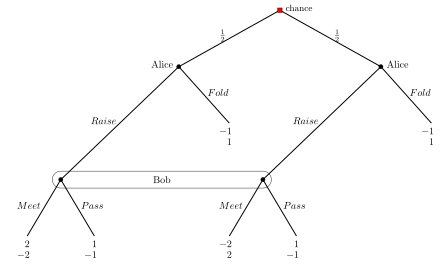

In [11]:
# Generate TikZ code from o.tex and render it
from IPython.display import display
from IPython.core.magic import register_cell_magic
from IPython import get_ipython

# Create the TikZ code using our function
generated_tikz = create_tikz_from_file("o.tex")

# Use the tikz magic to render the generated code
get_ipython().run_cell_magic('tikz', '', generated_tikz)